**Introduction to Data Science - Assisgnment 1 - Group 090**

Prepared By :
- **Sharath Vaidyanath - 2019HC04539**

## 1. Data Science Proposal

 - To identify the highest paid skills and its respective job categories by utilising feature extraction of text and determining the different clusters of different salary ranges based on job category and years of experience by K means clustering. 

In [1]:
#Loading the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import re

In [2]:
#Loading the data into a dataframe
df = pd.read_csv(r"F:\M.tech\Study Materials\2nd Sem Materials\Introduction to Data Science\Assignment\nyc-jobs.csv")

In [3]:
#Reading the head of the dataframe
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-12-17T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-12-17T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-12-17T00:00:00.000


In [4]:
#Reading the tail of the dataframe
df.tail()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
2941,426214,HOUSING PRESERVATION & DVLPMNT,External,1,Senior Mechanical Cost Estimator,CONSTRUCTION PROJECT MANAGER,34202,2,"Engineering, Architecture, & Planning",F,...,NaN,Apply Online.,NaN,100 Gold Street,NaN,New York City Residency is not required for th...,2019-12-16T00:00:00.000,2020-01-15T00:00:00.000,2019-12-16T00:00:00.000,2019-12-17T00:00:00.000
2942,426214,HOUSING PRESERVATION & DVLPMNT,Internal,1,Senior Mechanical Cost Estimator,CONSTRUCTION PROJECT MANAGER,34202,2,"Engineering, Architecture, & Planning",F,...,NaN,Apply Online.,NaN,100 Gold Street,NaN,New York City Residency is not required for th...,2019-12-16T00:00:00.000,2020-01-15T00:00:00.000,2019-12-16T00:00:00.000,2019-12-17T00:00:00.000
2943,426223,HOUSING PRESERVATION & DVLPMNT,Internal,1,Conversion Coordinator,COMMUNITY COORDINATOR,56058,0,Building Operations & Maintenance,F,...,NaN,Apply Online.,NaN,100 Gold Street,NaN,New York City residency is generally required ...,2019-12-16T00:00:00.000,2020-01-15T00:00:00.000,2019-12-16T00:00:00.000,2019-12-17T00:00:00.000
2944,426223,HOUSING PRESERVATION & DVLPMNT,External,1,Conversion Coordinator,COMMUNITY COORDINATOR,56058,0,Building Operations & Maintenance,F,...,NaN,Apply Online.,NaN,100 Gold Street,NaN,New York City residency is generally required ...,2019-12-16T00:00:00.000,2020-01-15T00:00:00.000,2019-12-16T00:00:00.000,2019-12-17T00:00:00.000
2945,426238,DEPARTMENT OF BUILDINGS,Internal,1,Administrative Associate,CLERICAL ASSOCIATE,10251,3,Administration & Human Resources,F,...,ONLY PERMANENT CLERICAL ASSOCIAT WILL BE CONSI...,For Current City Employees: Visit www.nyc.gov/...,NaN,NaN,NaN,New York City residency is generally required ...,2019-12-16T00:00:00.000,2019-12-30T00:00:00.000,2019-12-16T00:00:00.000,2019-12-17T00:00:00.000


In [5]:
#Reading the summary to get some insights about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         2946 non-null   int64  
 1   Agency                         2946 non-null   object 
 2   Posting Type                   2946 non-null   object 
 3   # Of Positions                 2946 non-null   int64  
 4   Business Title                 2946 non-null   object 
 5   Civil Service Title            2946 non-null   object 
 6   Title Code No                  2946 non-null   object 
 7   Level                          2946 non-null   object 
 8   Job Category                   2944 non-null   object 
 9   Full-Time/Part-Time indicator  2751 non-null   object 
 10  Salary Range From              2946 non-null   float64
 11  Salary Range To                2946 non-null   float64
 12  Salary Frequency               2946 non-null   o

In [6]:
df.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')

#### Columns Description :-

- **Job ID**: The Unique Job ID for each opening
- **Posting Type**: The opening type, whether internal or external, for the job.
- **# of Positions**: The number of positions available for a certain opening
- **Business Title**: The position the candidate would hold.
- **Civil Service Title**: The Broad Title the position would be classified under
- **Title Code No**: The Code for a particular title
- **Level**: The authority the certain opening would bring with it
- **Job Category**: Broad Classification of where all the jobs would fall in
- **Full-time/Part-Time**: Time frame of a job.
- **Salary Range From**: The beginning salary cap for that particular opening
- **Salary Range To**: The highest cap for that particular job opening.
- **Salary Frequency**: The payment factor for the job, hourly or annual
- **Work Location**: The location of the workplace
- **Division/Work Unit**: Broad working units for all the jobs 
- **Job Description**: A brief idea of what the job will contain
- **Minimum Qual Requirements**: The minimum qualifications a candidate must possess for the job
- **Preferred Skills**: Optimal skills which the posting is looking for
- **Additional Information**: Any additional information provided with the job opening
- **Hours/Shift**: The timings for the job
- **Work Location 1**: Additional information for the work location
- **Recruitment Contact**: Empty field, supposed to contain numbers
- **Residency Requirement**: Whether the employee must be a resident of NYC.
- **Posting date**: When the opening was announced.
- **Post Until**: The closing date.
- **Posting Updated**: The time when the posting was updated for the opening.
- **Process Date**: When the posting process was completed

## 2. Data Preprocessing :

In [7]:
#Checking for any Null values present at the data
df.isna()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,False,False,False,False,False,False,False,False,True,True,...,False,True,True,True,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,True,False,...,True,False,True,True,True,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False
2942,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False
2943,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False
2944,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False


In [8]:
#Checking for total number of null values present
df.isna().sum()

Job ID                              0
Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Code No                       0
Level                               0
Job Category                        2
Full-Time/Part-Time indicator     195
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements          20
Preferred Skills                  393
Additional Information           1092
To Apply                            1
Hours/Shift                      2062
Work Location 1                  1588
Recruitment Contact              2946
Residency Requirement               4
Posting Date                        4
Post Until                       2075
Posting Upda

As we see from the above step that **Recruitment Contact**, **Hours/Shift**, **Post Until** and **Work Location 1** has more than **50% null values**, so it's obvious that we drop these columns

In [9]:
df = df.drop(['Recruitment Contact', 'Hours/Shift', 'Post Until', 'Work Location 1'],axis=1)

Also, Even **'Additional Information'** is not relevant to our requirement, so it can be removed

In [10]:
df = df.drop(['Additional Information'],axis=1)

In [11]:
df.isna().sum()

Job ID                             0
Agency                             0
Posting Type                       0
# Of Positions                     0
Business Title                     0
Civil Service Title                0
Title Code No                      0
Level                              0
Job Category                       2
Full-Time/Part-Time indicator    195
Salary Range From                  0
Salary Range To                    0
Salary Frequency                   0
Work Location                      0
Division/Work Unit                 0
Job Description                    0
Minimum Qual Requirements         20
Preferred Skills                 393
To Apply                           1
Residency Requirement              4
Posting Date                       4
Posting Updated                    4
Process Date                       4
dtype: int64

In [12]:
# replacing Nan values in the dataset using backfill method
df.fillna( method = 'bfill',inplace = True)

In [13]:
df.isnull().sum()

Job ID                           0
Agency                           0
Posting Type                     0
# Of Positions                   0
Business Title                   0
Civil Service Title              0
Title Code No                    0
Level                            0
Job Category                     0
Full-Time/Part-Time indicator    0
Salary Range From                0
Salary Range To                  0
Salary Frequency                 0
Work Location                    0
Division/Work Unit               0
Job Description                  0
Minimum Qual Requirements        0
Preferred Skills                 0
To Apply                         0
Residency Requirement            0
Posting Date                     0
Posting Updated                  0
Process Date                     0
dtype: int64

The Data is now clean!!!

In [14]:
df

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,To Apply,Residency Requirement,Posting Date,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,Maintenance & Operations,F,...,110 William St. N Y,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,"In addition to applying through this website, ...",New York City residency is generally required ...,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,Maintenance & Operations,F,...,110 William St. N Y,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,1. A High School Diploma or GED. 2. CDL Dri...,"In addition to applying through this website, ...",New York City residency is generally required ...,2012-01-26T00:00:00.000,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,Heating Mgt-Operations,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,"Click the ""Apply Now"" button.",NYCHA has no residency requirements.,2013-10-24T00:00:00.000,2013-12-12T00:00:00.000,2019-12-17T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,Heating Mgt-Operations,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,"Click the ""Apply Now"" button.",NYCHA has no residency requirements.,2013-10-24T00:00:00.000,2013-12-12T00:00:00.000,2019-12-17T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,DMP-Contract & Analysis Unit,Dept of Management & Planning,Responsibilities of selected candidates will i...,1. Five years of full-time satisfactory experi...,Strong analytical background; advanced profic...,"Click the ""Apply Now"" button.",NYCHA has no residency requirement.,2014-01-09T00:00:00.000,2014-01-08T00:00:00.000,2019-12-17T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,426214,HOUSING PRESERVATION & DVLPMNT,External,1,Senior Mechanical Cost Estimator,CONSTRUCTION PROJECT MANAGER,34202,2,"Engineering, Architecture, & Planning",F,...,100 Gold Street,"Eng, Design Const Supp",The New York City Department of Housing Preser...,1. A four-year high school diploma or its educ...,"1.\tThorough knowledge of City, State and Fede...",Apply Online.,New York City Residency is not required for th...,2019-12-16T00:00:00.000,2019-12-16T00:00:00.000,2019-12-17T00:00:00.000
2942,426214,HOUSING PRESERVATION & DVLPMNT,Internal,1,Senior Mechanical Cost Estimator,CONSTRUCTION PROJECT MANAGER,34202,2,"Engineering, Architecture, & Planning",F,...,100 Gold Street,"Eng, Design Const Supp",The New York City Department of Housing Preser...,1. A four-year high school diploma or its educ...,"1.\tThorough knowledge of City, State and Fede...",Apply Online.,New York City Residency is not required for th...,2019-12-16T00:00:00.000,2019-12-16T00:00:00.000,2019-12-17T00:00:00.000
2943,426223,HOUSING PRESERVATION & DVLPMNT,Internal,1,Conversion Coordinator,COMMUNITY COORDINATOR,56058,0,Building Operations & 

## 3. Exploratory Data Analysis

In [15]:
#Performing a correlation analysis between the variables.
df.corr().transpose()

,Job ID,# Of Positions,Salary Range From,Salary Range To
Job ID,1.000000,-0.024525,0.051788,-0.006429
# Of Positions,-0.024525,1.000000,-0.165442,-0.163269
Salary Range From,0.051788,-0.165442,1.000000,0.748932
Salary Range To,-0.006429,-0.163269,0.748932,1.000000


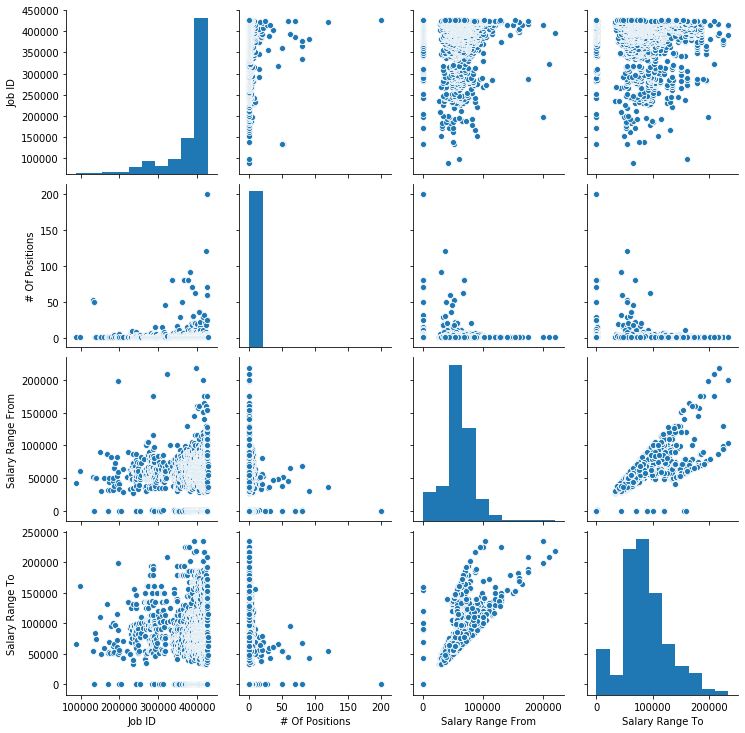

In [16]:
sns.pairplot(df,palette='viridis')

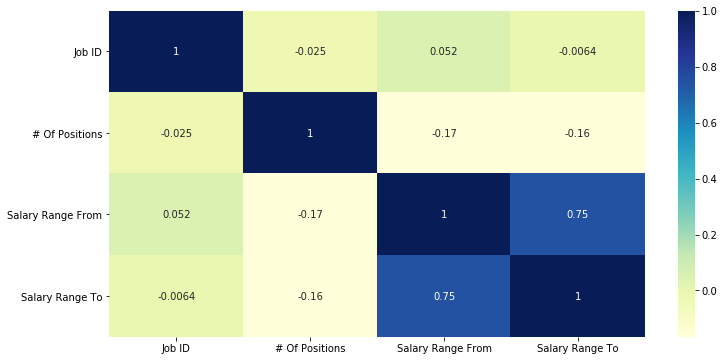

In [17]:
#Visualzing the heatmap for the correlated data
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

From the above heatmap, it's clear that the relationship between the variables **Salary Range From** and **Salary Range To** is pretty good.. Hence, exploiting these variables to do further EDA.

In [18]:
#Top 10 business titles that has the highest salary range
high_sal_range = (df.groupby('Business Title')['Salary Range To'].mean().nlargest(10)).reset_index()
high_sal_range

,Business Title,Salary Range To
0,"Deputy Commissioner, Public Information, M-VII",234402.0
1,executive Vice President for Operations,234402.0
2,"Deputy Commissioner, Family & Child Health",225217.0
3,ADMINISTRATIVE MANAGEMENT AUDITOR,224749.0
4,EVP for Real Estate,224749.0
5,"Deputy Commissioner, Bureau of Customer Services",218587.0
6,Associate Commissioner,217244.0
7,VP - Operations,217244.0
8,VP- Operations,217244.0
9,"Deputy Commissioner, Water and Sewer Operations",209585.0


Oh. It seems that **Deputy Commissioner, Public Information, M-VII**, has the highest avergae salary range, ranging upto $230,000 per year!
Now that's an impressive amount. 

Most of the openings in the top ten highest salary seem to be from executive fields, or higher posts. These are the fields which rake in most of the money, on average, paving way for the high salaries people seem to hear about!

In [19]:
#Top 10 popular job categories 
popular_categories = (df['Job Category'].value_counts()[:5]).reset_index()
popular_categories

,index,Job Category
0,"Engineering, Architecture, & Planning",504
1,"Technology, Data & Innovation",313
2,Legal Affairs,226
3,"Public Safety, Inspections, & Enforcement",182
4,Building Operations & Maintenance,181


Well.. It seems that **Engineering, Architecture, & Planning** , in general, holds the maximum numbers of job titles.

In [20]:
#Top 10 Job Openings via Category
job_categorydf = df['Job Category'].value_counts(sort=True, ascending=False)[:10].rename_axis('Job Category').reset_index(name='Counts')
job_categorydf = job_categorydf.sort_values('Counts')
job_categorydf

,Job Category,Counts
9,"Policy, Research & Analysis",124
8,Health,125
7,Constituent Services & Community Programs,129
6,Administration & Human Resources,134
5,"Finance, Accounting, & Procurement",169
4,Building Operations & Maintenance,181
3,"Public Safety, Inspections, & Enforcement",182
2,Legal Affairs,226
1,"Technology, Data & Innovation",313
0,"Engineering, Architecture, & Planning",504


## 4. Feature Selection

   Here, let's perform 2 feature engineering techniques :- **Grouping Operations** and **Distribution Imputation** 

   First, Let's apply **Grouping operations**
   
Let's use the data satisfying the following conditions.

- 'Salary Range From' > 0
- 'Salary Range To' > 0
- 'Salary Frequency' = Annual
- 'Full-Time/Part-Time indicator' = F (full time)
- 'Job Category' != NaN
- 'Preferred Skills' ! = NaN

In [21]:
df = df.dropna(subset=['Salary Range From', 'Salary Range To', 'Salary Frequency','Full-Time/Part-Time indicator', 'Job Category', 'Preferred Skills']) 
df = df[(df['Salary Frequency'] =='Annual') & (df['Full-Time/Part-Time indicator']  =='F') & (df['Salary Range From'] > 0) & (df['Salary Range To']  >0)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664 entries, 0 to 2945
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         2664 non-null   int64  
 1   Agency                         2664 non-null   object 
 2   Posting Type                   2664 non-null   object 
 3   # Of Positions                 2664 non-null   int64  
 4   Business Title                 2664 non-null   object 
 5   Civil Service Title            2664 non-null   object 
 6   Title Code No                  2664 non-null   object 
 7   Level                          2664 non-null   object 
 8   Job Category                   2664 non-null   object 
 9   Full-Time/Part-Time indicator  2664 non-null   object 
 10  Salary Range From              2664 non-null   float64
 11  Salary Range To                2664 non-null   float64
 12  Salary Frequency               2664 non-null   o

Oh.. We have got 2264 samples

Let's check the distribution of salaries :-

In [22]:
df.describe()

,Job ID,# Of Positions,Salary Range From,Salary Range To
count,2664.000000,2664.000000,2664.000000,2664.000000
mean,384832.999249,2.008634,64330.867575,92755.369437
std,52988.232371,5.627797,21087.530905,36267.976103
min,87990.000000,1.000000,26457.000000,32665.000000
25%,377572.000000,1.000000,52137.000000,65000.000000
50%,404739.000000,1.000000,60435.000000,84400.500000
75%,420067.000000,1.000000,73938.000000,109153.000000
max,426238.000000,120.000000,218587.000000,234402.000000


Next, Let's apply **Distribution Imputation**

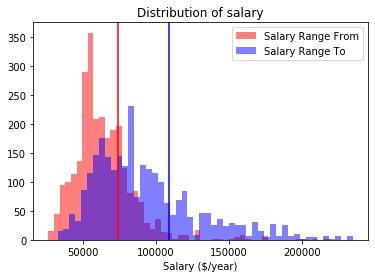

In [23]:
plt.hist(df['Salary Range From'], bins=50, alpha=  0.5, color='r', label='Salary Range From')
plt.hist(df['Salary Range To'],     bins=50, alpha = 0.5, color='b', label='Salary Range To')
plt.xlabel('Salary ($/year)')
plt.title('Distribution of salary')

#Plotting a vertical axis line indiacting the 75th Quartile
plt.axvline(df['Salary Range From'].quantile(.75), color='r')
plt.axvline(df['Salary Range To'].quantile(.75), color='b')

plt.legend()
plt.show()

We can see the following results.

- The 75 percentile value for "Salary Range From" is $73938/year.

- The 75 percentile vaule for "Salary Range To " is $109153/year.

Therefore, we decided to identify the following words.

1. Words in "Job Category" for jobs whose minimum salary is more than $73938/year.

1. Words in "Job Category" for jobs whose maximum salary is more than $109153/year.

1. Words in "Preferred Skills" for jobs whose minimum salary is more than $73938/year.

1. Words in "Preferred Skills" for jobs whose maximum salary is more than $109153/year.

**Tagging :-**

We add two following tags to the dataframe.

- Min_Salary75: 1 for "Salary Range From" > $73938/year, otherwise 0.

- Max_Salary75: 1 for "Salary Range To" > $109153/year, otherwise 0.

In [24]:
min75 = 73938
max75 = 109153

df.loc[  (df['Salary Range From'] > min75), 'Min_Salary75'] = 1
df.loc[~(df['Salary Range From'] > min75), 'Min_Salary75'] = 0

df.loc[ (df['Salary Range To'] > max75), 'Max_Salary75'] = 1
df.loc[~(df['Salary Range To'] > max75), 'Max_Salary75'] = 0

df['Min_Salary75'] = df['Min_Salary75'].astype(int)
df['Max_Salary75'] = df['Max_Salary75'].astype(int)

df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Job Description,Minimum Qual Requirements,Preferred Skills,To Apply,Residency Requirement,Posting Date,Posting Updated,Process Date,Min_Salary75,Max_Salary75
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,Maintenance & Operations,F,...,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,"In addition to applying through this website, ...",New York City residency is generally required ...,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000,0,0
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,Maintenance & Operations,F,...,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,1. A High School Diploma or GED. 2. CDL Dri...,"In addition to applying through this website, ...",New York City residency is generally required ...,2012-01-26T00:00:00.000,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000,0,1
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,"Click the ""Apply Now"" button.",NYCHA has no residency requirements.,2013-10-24T00:00:00.000,2013-12-12T00:00:00.000,2019-12-17T00:00:00.000,0,0
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,"Click the ""Apply Now"" button.",NYCHA has no residency requirements.,2013-10-24T00:00:00.000,2013-12-12T00:00:00.000,2019-12-17T00:00:00.000,0,0
6,137433,DEPT OF HEALTH/MENTAL HYGIENE,Internal,1,Contract Analyst,PROCUREMENT ANALYST,12158,3,"Finance, Accounting, & Procurement",F,...,** OPEN TO PERMANENT PROCUREMENT ANALYSTS ONLY...,1. A baccalaureate degree from an accredited c...,Strong analytical background; advanced profic...,Apply online with a cover letter to https://a1...,New York City residency is generally required ...,2013-12-09T00:00:00.000,2013-12-09T00:00:00.000,2019-12-17T00:00:00.000,0,0


## 5. Determining the highest paid skills 

Here, we first conduct the following preprocessing for the text for "Job Category" and "Preferred Skills".

We shall :-
- Delete all characters except for alphabet and space.
- Change all characters into lower cases.

In [25]:
def clensing(df_series):
    df = df_series.replace('[^a-zA-Z ]',' ', regex = True)
    df = df.str.lower()
    return df

df['JobCat'] = clensing(df['Job Category'])
df['PrefSkills']     = clensing(df['Preferred Skills'])

In [26]:
df['PrefSkills'].head()

0        excellent interpersonal and organizational...
1        a high school diploma or ged       cdl dri...
2        a high school diploma or ged       cdl dri...
3        a high school diploma or ged       cdl dri...
6    strong analytical background   advanced profic...
Name: PrefSkills, dtype: object

In [27]:
df['JobCat'].head()

0              maintenance   operations
1              maintenance   operations
2              maintenance   operations
3              maintenance   operations
6    finance  accounting    procurement
Name: JobCat, dtype: object

### Calculating the tf-idf and identify important words

Let's calculate tf-idf for the following four patterns, and determine the important words.

1. Words in "Job Category" for jobs whose minimum salary is more than $73938/year.

2. Words in "Job Category" for jobs whose maximum salary is more than $109153/year.

3. Words in "Preferred Skills" for jobs whose minimum salary is more than $73938/year.

4. Words in "Preferred Skills" for jobs whose maximum salary is more than $109153/year.

#### CASE 1: Job Category for high minimum salary.

First, we calculate tf-idf.

In [28]:
def calc_tfidf(docs, count, tfidf):
    bag = count.fit_transform(docs)
    t = tfidf.fit_transform(bag)
    return bag, t

def conc_text(texts, flags):
    pos = ""
    neg = ""
    for (t,f) in zip(texts.values, flags.values):
        if f >0:
            pos = pos + t + " "
        else:
            neg = neg + t + " "
    
    return [pos,neg]

tfidf = TfidfTransformer(use_idf = True, norm ='l2', smooth_idf = True)
count = CountVectorizer()

docs1 = conc_text(df['JobCat'], df['Min_Salary75'])
bag1, tfidf1 = calc_tfidf(docs1, count, tfidf)

Let's check the shape of bag of words

In [29]:
bag1.shape

(2, 38)

We found that there are 38 words in the text.

We can check the tf-idf values for each words in two text types; high salary jobs and low salary jobs

In [30]:
print(tfidf1.toarray())

[[0.0904233  0.06607856 0.         0.19649678 0.19301896 0.32343718
  0.04173383 0.         0.         0.03477819 0.04521165 0.04521165
  0.3634321  0.09390112 0.32343718 0.0904233  0.06260074 0.06607856
  0.02260582 0.3634321  0.09390112 0.03477819 0.16171859 0.04521165
  0.04521165 0.32343718 0.19301896 0.0904233  0.04521165 0.09390112
  0.19301896 0.06607856 0.09390112 0.06260074 0.0173891  0.
  0.38603792 0.02260582]
 [0.15962736 0.12716078 0.01521022 0.17991898 0.22117859 0.32263666
  0.09266504 0.00760511 0.01521022 0.03923045 0.11363304 0.10822194
  0.12580801 0.21982582 0.32263666 0.15962736 0.09063588 0.12716078
  0.01217497 0.12580801 0.21982582 0.03923045 0.14609962 0.09807613
  0.09807613 0.32263666 0.22117859 0.15962736 0.10822194 0.21982582
  0.2157675  0.12716078 0.21982582 0.19412311 0.08049007 0.01521022
  0.13798298 0.01217497]]


In [31]:
def stats(count, tfidf):
    df1 = pd.DataFrame(list(count.vocabulary_.items()),columns=['word','id'])
    df1 = df1.sort_values('id').reset_index()
    dfx = pd.DataFrame(tfidf.toarray().T)
    dfx.columns = ['tf-idf for high salary', 'tf-idf for low salary']
    df1 = pd.concat([df1, dfx], axis=1)
    df1['diff'] = df1['tf-idf for high salary']- df1['tf-idf for low salary']
    return df1

df1 = stats(count,tfidf1)

In [32]:
df1.head()

,index,word,id,tf-idf for high salary,tf-idf for low salary,diff
0,19,accounting,0,0.090423,0.159627,-0.069204
1,21,administration,1,0.066079,0.127161,-0.061082
2,35,administrative,2,0.000000,0.015210,-0.015210
3,26,affairs,3,0.196497,0.179919,0.016578
4,12,analysis,4,0.193019,0.221179,-0.028160


Identify the words having large difference for tf-idf values between high salary and low salary jobs

In [33]:
df1.nlargest(20,'diff')

,index,word,id,tf-idf for high salary,tf-idf for low salary,diff
36,4,technology,36,0.386038,0.137983,0.248055
12,8,data,12,0.363432,0.125808,0.237624
19,9,innovation,19,0.363432,0.125808,0.237624
3,26,affairs,3,0.196497,0.179919,0.016578
22,25,legal,22,0.161719,0.146100,0.015619
18,3,information,18,0.022606,0.012175,0.010431
37,5,telecommunications,37,0.022606,0.012175,0.010431
5,1,architecture,5,0.323437,0.322637,0.000801
14,0,engineering,14,0.323437,0.322637,0.000801
25,2,planning,25,0.323437,0.322637,0.000801


**Observation :-**  

We can see that the highest minimum paying category is **technology**.

#### CASE 2: Job Category for high maximum salary.

In [34]:
docs2 = conc_text(df['JobCat'], df['Max_Salary75'])
bag2, tfidf2 = calc_tfidf(docs2, count, tfidf)
df2 = stats(count, tfidf2)
df2.nlargest(20,'diff')

,index,word,id,tf-idf for high salary,tf-idf for low salary,diff
36,6,technology,36,0.326623,0.161472,0.165151
12,14,data,12,0.309522,0.147043,0.162479
19,15,innovation,19,0.309522,0.147043,0.162479
5,3,architecture,5,0.396736,0.296147,0.100589
14,2,engineering,14,0.396736,0.296147,0.100589
25,4,planning,25,0.396736,0.296147,0.100589
18,5,information,18,0.017101,0.014429,0.002671
37,7,telecommunications,37,0.017101,0.014429,0.002671
7,37,business,7,0.000000,0.007726,-0.007726
22,26,legal,22,0.143646,0.154601,-0.010955


**Observation :-** 

We can see that the highest maximum paying category is **technology**.

#### CASE 3: Preferred skills for jobs with high minimum salary.

In [35]:
docs3 = conc_text(df['PrefSkills'], df['Min_Salary75'])
bag3, tfidf3 = calc_tfidf(docs3, count, tfidf)
df3 = stats(count, tfidf3)
df3.nlargest(20,'diff')

,index,word,id,tf-idf for high salary,tf-idf for low salary,diff
1738,6,experience,1738,0.246165,0.181722,0.064442
5019,16,with,5019,0.194066,0.162502,0.031564
1301,473,development,1301,0.038664,0.016570,0.022094
4085,76,security,4085,0.027617,0.005905,0.021712
4296,113,sql,4296,0.028811,0.007291,0.021521
5081,1,years,5081,0.062400,0.040972,0.021428
3140,2,of,3140,0.284082,0.265655,0.018428
3157,105,on,3157,0.038216,0.022836,0.015380
229,4,and,229,0.723865,0.708874,0.014991
4971,102,web,4971,0.015824,0.001808,0.014016


**Observation :-**

We can see a lot of IT related words like **development** ,**security**, **sql** and **oracle**.

#### CASE 4: Preferred skills for jobs with high maximum salary.

In [36]:
docs4 = conc_text(df['PrefSkills'], df['Max_Salary75'])
bag4, tfidf4 = calc_tfidf(docs4, count, tfidf)
df4 = stats(count, tfidf4)
df4.nlargest(20,'diff')

,index,word,id,tf-idf for high salary,tf-idf for low salary,diff
1738,44,experience,1738,0.242340,0.183221,0.059118
5081,41,years,5081,0.072300,0.036934,0.035366
2736,208,management,2736,0.093425,0.063307,0.030118
3140,22,of,3140,0.291581,0.262641,0.028940
3611,331,project,3611,0.051324,0.031261,0.020063
1301,192,development,1301,0.036299,0.017501,0.018798
4548,170,technical,4548,0.038382,0.020459,0.017923
986,547,construction,986,0.037340,0.020398,0.016942
4085,107,security,4085,0.023356,0.007604,0.015752
4316,175,staff,4316,0.022166,0.010199,0.011967


**Observation :-**

We found words related to 'management' like **management** and **managerial** and 'engineering' like **security**, **application**, **engineering** and **construction** respectively.

**Inference :-**

Here we found the following patterns.

- The most paid job category is **techonolgy** and its most sought skills are **sql**, **oracle** and **security**.
- We had also found that people with **managerial** skills in addition to their technical skills, are highly paid than others
- In addition to above, people with engineering skills are also paid well.

## 6. Determing the clusters of different salary ranges based on job category and years of experience.

In [37]:
df['Posting Date'] = pd.to_datetime(df['Posting Date'])

In [38]:
df['Process Date'] = pd.to_datetime(df['Process Date'])

As there is no column for years of exprience, we can assume that process date is the date when either latest or new posting has been published by the employer

In [39]:
df['years of exprience'] = df['Process Date'] - df['Posting Date']

In [40]:
df['years of exprience'] = df['years of exprience'].dt.days

In [41]:
df_cluster = df[['Job Category','Salary Range To','years of exprience']]

In [42]:
df_cluster.isna().sum()

Job Category          0
Salary Range To       0
years of exprience    0
dtype: int64

In [43]:
df_cluster['Job Category'].value_counts().reset_index()

,index,Job Category
0,"Engineering, Architecture, & Planning",491
1,"Technology, Data & Innovation",288
2,Legal Affairs,220
3,"Public Safety, Inspections, & Enforcement",175
4,"Finance, Accounting, & Procurement",158
...,...,...
117,"Administration & Human Resources Technology, D...",1
118,"Administration & Human Resources Finance, Acco...",1
119,Administration & Human Resources Communication...,1
120,Administration & Human Resources Constituent S...,1


In [44]:
df_cluster=df_cluster.replace('\*','',regex=True)

In [45]:
df_cluster

,Job Category,Salary Range To,years of exprience
0,Maintenance & Operations,65485.00,3098
1,Maintenance & Operations,162014.00,2882
2,Maintenance & Operations,54580.32,2245
3,Maintenance & Operations,54580.32,2245
6,"Finance, Accounting, & Procurement",85053.00,2199
...,...,...,...
2941,"Engineering, Architecture, & Planning",78000.00,1
2942,"Engineering, Architecture, & Planning",78000.00,1
2943,Building Operations & Maintenance,62215.00,1
2944,Building Operations & Maintenance,62215.00,1


We are creating new dataframe with job category, maximum salary for the respective role and years of exprience. Reason of taking max salary instead of mean salary is to categorize those set of job which demands niche skills and higher salary

In [46]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [47]:
#Let's check the Hopkins measure
hopkin_df = df_cluster
hopkins(hopkin_df.drop(['Job Category'],axis=1))

0.9924477044766562

**0.99** is a good Hopkins score. Hence the data is very much suitable for clustering. Preliminary check is now done. Standardising the data.

In [48]:
from sklearn import preprocessing
df_cluster_std = df_cluster
X_C = df_cluster_std.drop(['Job Category'],axis=1)
df_cluster_std = preprocessing.StandardScaler().fit_transform(X_C)

In [49]:
df_cluster

,Job Category,Salary Range To,years of exprience
0,Maintenance & Operations,65485.00,3098
1,Maintenance & Operations,162014.00,2882
2,Maintenance & Operations,54580.32,2245
3,Maintenance & Operations,54580.32,2245
6,"Finance, Accounting, & Procurement",85053.00,2199
...,...,...,...
2941,"Engineering, Architecture, & Planning",78000.00,1
2942,"Engineering, Architecture, & Planning",78000.00,1
2943,Building Operations & Maintenance,62215.00,1
2944,Building Operations & Maintenance,62215.00,1


- Let's use **K-means Clustering** to determine the clusters

In [50]:
#Let's check the silhouette score first to identify the ideal number of clusters
# To perform KMeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df_cluster_std)
    sse_.append([k, silhouette_score(df_cluster_std, kmeans.labels_)])

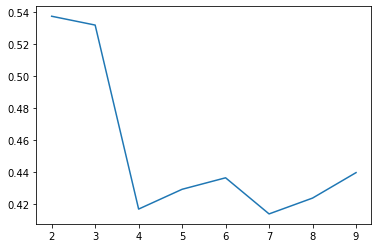

In [51]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

The sihouette score reaches a peak at around **3 clusters** indicating that it might be the ideal number of clusters.

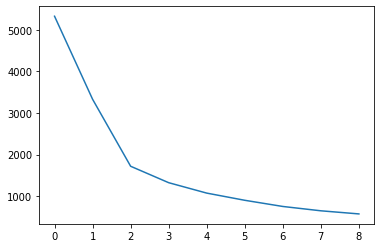

In [52]:
#The sihouette score reaches a peak at around 3 clusters indicating that it might be the ideal number of clusters.
#Let's use the elbow curve method to identify the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_cluster_std)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

A distinct elbow is formed at around **2-5 clusters**. Let's finally create the clusters and see for ourselves which ones fare better

In [53]:
#K-means with k=3 clusters
model_clus4 = KMeans(n_clusters = 3, max_iter=50)
model_clus4.fit(df_cluster_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
dat4=df_cluster
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus4.labels_)], axis=1)
dat_km.columns = ['Job Category','salary_max','exp','ClusterID']
dat_km

,Job Category,salary_max,exp,ClusterID
0,Maintenance & Operations,65485.00,3098,1
1,Maintenance & Operations,162014.00,2882,1
2,Maintenance & Operations,54580.32,2245,1
3,Maintenance & Operations,54580.32,2245,1
4,"Finance, Accounting, & Procurement",85053.00,2199,1
...,...,...,...,...
2659,"Engineering, Architecture, & Planning",78000.00,1,0
2660,"Engineering, Architecture, & Planning",78000.00,1,0
2661,Building Operations & Maintenance,62215.00,1,0
2662,Building Operations & Maintenance,62215.00,1,0


In [55]:
dat_km['ClusterID'].value_counts()

0    1772
2     563
1     329
Name: ClusterID, dtype: int64

In [56]:
dat_km

,Job Category,salary_max,exp,ClusterID
0,Maintenance & Operations,65485.00,3098,1
1,Maintenance & Operations,162014.00,2882,1
2,Maintenance & Operations,54580.32,2245,1
3,Maintenance & Operations,54580.32,2245,1
4,"Finance, Accounting, & Procurement",85053.00,2199,1
...,...,...,...,...
2659,"Engineering, Architecture, & Planning",78000.00,1,0
2660,"Engineering, Architecture, & Planning",78000.00,1,0
2661,Building Operations & Maintenance,62215.00,1,0
2662,Building Operations & Maintenance,62215.00,1,0


Now that we have our clusters.. Let's calculate the accuracy of the model

In [57]:
from sklearn.metrics import confusion_matrix,classification_report
print("Confusion Matrix :- \n",confusion_matrix(dat_km['ClusterID'],model_clus4.labels_))
print("\n")
print("Classification Report :- \n",classification_report(dat_km['ClusterID'],model_clus4.labels_))

Confusion Matrix :- 
 [[1772    0    0]
 [   0  329    0]
 [   0    0  563]]


Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1772
           1       1.00      1.00      1.00       329
           2       1.00      1.00      1.00       563

    accuracy                           1.00      2664
   macro avg       1.00      1.00      1.00      2664
weighted avg       1.00      1.00      1.00      2664



WOW!!! It's 100% Accurate... We have perfect clusters of the data!!

In [58]:
#One thing we noticed is all distinct clusters are being formed except cluster 1 with more data points
#Now let's create the cluster means wrt to the various variables mentioned in the question and plot and see how they are related
df_final=pd.merge(df,dat_km,on='Job Category')

In [59]:
df_final

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Posting Updated,Process Date,Min_Salary75,Max_Salary75,JobCat,PrefSkills,years of exprience,salary_max,exp,ClusterID
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,Maintenance & Operations,F,...,2011-06-24T00:00:00.000,2019-12-17,0,0,maintenance operations,excellent interpersonal and organizational...,3098,65485.00,3098,1
1,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,Maintenance & Operations,F,...,2011-06-24T00:00:00.000,2019-12-17,0,0,maintenance operations,excellent interpersonal and organizational...,3098,162014.00,2882,1
2,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,Maintenance & Operations,F,...,2011-06-24T00:00:00.000,2019-12-17,0,0,maintenance operations,excellent interpersonal and organizational...,3098,54580.32,2245,1
3,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,Maintenance & Operations,F,...,2011-06-24T00:00:00.000,2019-12-17,0,0,maintenance operations,excellent interpersonal and organizational...,3098,54580.32,2245,1
4,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,Maintenance & Operations,F,...,2011-06-24T00:00:00.000,2019-12-17,0,0,maintenance operations,excellent interpersonal and organizational...,3098,65458.80,1707,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503811,425072,DEPT OF PARKS & RECREATION,Internal,1,Project Development Coordinator for Operations,COMMUNITY COORDINATOR,56058,0,Administration & Human Resources Building Oper...,F,...,2019-12-05T00:00:00.000,2019-12-17,0,0,administration human resources building oper...,bachelor s degree excellent communica...,11,83981.00,11,0
503812,425072,DEPT OF PARKS & RECREATION,Internal,1,Project Development Coordinator for Operations,COMMUNITY COORDINATOR,56058,0,Administration & Human Resources Building Oper...,F,...,2019-12-05T00:00:00.000,2019-12-17,0,0,administration human resources building oper...,bachelor s degree excellent communica...,11,83981.00,11,0
503813,425072,DEPT OF PARKS & RECREATION,Internal,1,Project Development Coordinator for Operations,COMMUNITY COORDINATOR,56058,0,Administration & Human Resources Building Oper...,F,...,2019-12-05T00:00:00.000,2019-12-17,0,0,administration human resources building oper...,bachelor s degree excellent communica...,11,83981.00,11,0
503814,425072,DEPT OF PARKS & RECREATION,Internal,1,Project Development Coordinator for Operations,COMMUNITY COORDINATOR,56058,0,Administration & Human Resources Building Oper...,F,...,2019-12-05T00:00:00.000,2019-12-17,0,0,administration human resources building oper...,bachelor s degree excellent communica...,11,83981.00,11,0


In [60]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503816 entries, 0 to 503815
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Job ID                         503816 non-null  int64         
 1   Agency                         503816 non-null  object        
 2   Posting Type                   503816 non-null  object        
 3   # Of Positions                 503816 non-null  int64         
 4   Business Title                 503816 non-null  object        
 5   Civil Service Title            503816 non-null  object        
 6   Title Code No                  503816 non-null  object        
 7   Level                          503816 non-null  object        
 8   Job Category                   503816 non-null  object        
 9   Full-Time/Part-Time indicator  503816 non-null  object        
 10  Salary Range From              503816 non-null  float64       
 11  

Text(0, 0.5, 'Years_of_Experience')

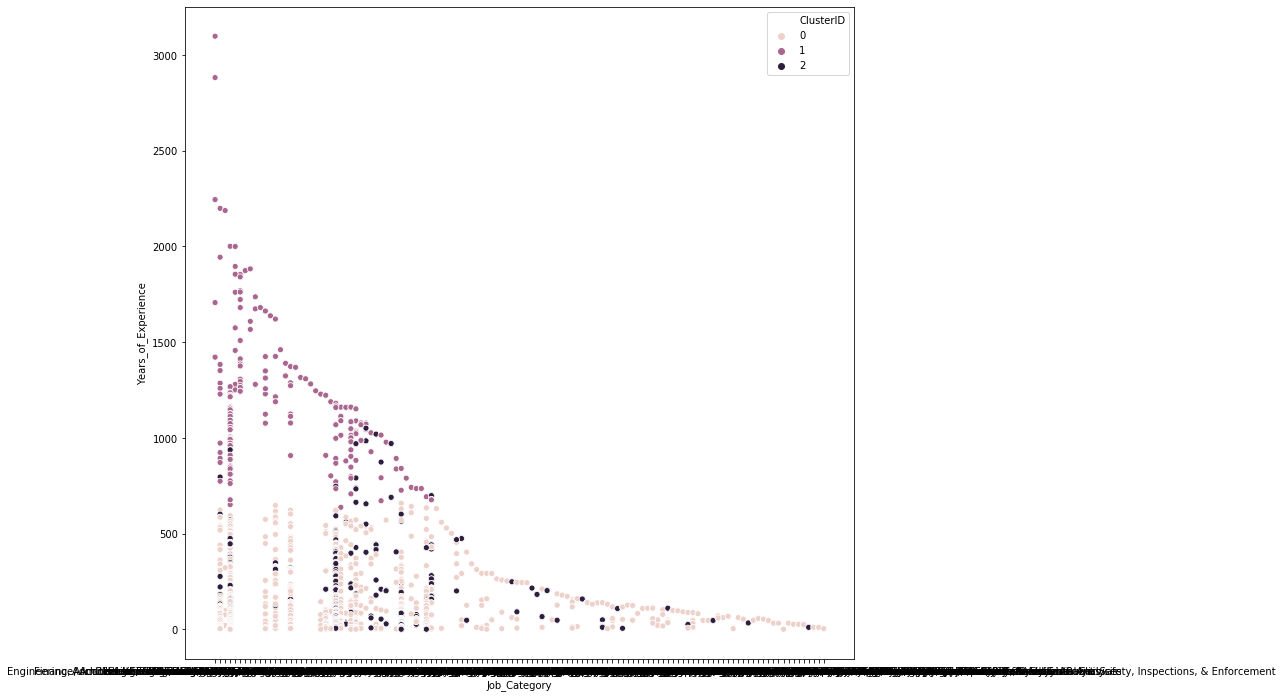

In [61]:
#Along Job category and years of exprience
plt.figure(figsize=(12,12))
sns.scatterplot(x='Job Category',y='exp',hue='ClusterID',data=dat_km)
plt.xlabel("Job_Category")
plt.ylabel("Years_of_Experience")

From the above plot, it can be seen that different salary ranges based on job category and years of experience(exp).

In [62]:
#let's take a look at those Job category clusters and try to make sense if the clustering process worked well.
df_final_on_jobcat = df_final[df_final['ClusterID']==1]

In [63]:
df_final_on_jobcat['Job Category'].value_counts()

Engineering, Architecture, & Planning                                                    42226
Technology, Data & Innovation                                                             4320
Finance, Accounting, & Procurement                                                        3002
Public Safety, Inspections, & Enforcement                                                 2625
Building Operations & Maintenance                                                         2288
Administration & Human Resources                                                          1332
Policy, Research & Analysis                                                               1070
Social Services                                                                            840
Information Technology & Telecommunications                                                784
Engineering, Architecture, & Planning Public Safety, Inspections, & Enforcement            600
Health                                            

**Inference :-**

Hence, It can be concluded from the above analysis that:

Engineering, Architecture, & Planning 	: **42226**

has more number of demand as well as higher salary with respect to niche skills. Whereas for last few job category there are having very less openings coming like

Administration & Human Resources Health Public Safety, Inspections, & Enforcement  : **1**

It is obvious from the clustering as well as the merged data with cluster information that cluster 1 belongs to those set which has more openings and higher demand with more salary

## 7. Conclusion:-

Hence, It can be concluded as : 

1. The most paid job category is **techonolgy** and its most sought skills are **sql**, **oracle** and **security**.

2. We had also found that people with **managerial** skills in addition to their technical skills, are highly paid than others

3. In addition to above, people with engineering skills are also paid well.

4. The Job Category **Engineering, Architecture, & Planning** has the highest number of demand as well as higher salary with respect to niche skills.

5. The Job Category **Administration & Human Resources Health Public Safety, Inspections, & Enforcement** has the least demand 